## Version III

In [2]:
import pickle
with open("s2m2_true_iDE_IME_DDE_DME_direct_est_stdM_1_stdS_1.txt","rb") as fp:
    Error = pickle.load(fp) 
    
import numpy as np
out = []
for t in [3200,6400]:
    out.append(Error[t][100])
import pandas as pd
out = pd.DataFrame(out)
out['d0'] = out[0]-out[0].shift(-1)
out['d1'] = out[1]-out[1].shift(-1)
out['d2'] = out[2]-out[2].shift(-1)
out['d3'] = out[3]-out[3].shift(-1)
out['d4'] = out[4]-out[4].shift(-1)
out['IDE'] = out[0]-out[1]
out['IME'] = out[1]-out[2]
out['DDE'] = out[2]-out[3]
out['DME'] = out[3]-out[4]
out['IDE_d'] = out['IDE']-out['IDE'].shift(-1)
out['IME_d'] = out['IME']-out['IME'].shift(-1)
out['DDE_d'] = out['DDE']-out['DDE'].shift(-1)
out['DME_d'] = out['DME']-out['DME'].shift(-1)
out

,0,1,2,3,4,d0,d1,d2,d3,d4,IDE,IME,DDE,DME,IDE_d,IME_d,DDE_d,DME_d
0,10.664367,7.784712,3.830104,2.228246,0.899898,-0.004076,-0.003173,-0.001852,-0.001222,-0.000149,2.879656,3.954607,1.601858,1.328348,-0.000903,-0.001322,-0.00063,-0.001073
1,10.668444,7.787885,3.831956,2.229468,0.900047,NaN,NaN,NaN,NaN,NaN,2.880559,3.955929,1.602488,1.329421,NaN,NaN,NaN,NaN


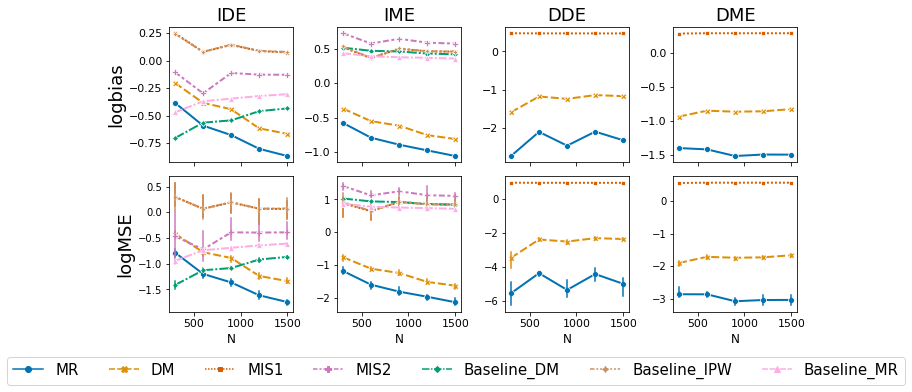

In [4]:
#Truncate does not matter 20 ok
import pickle
with open("s2m2_estimate_additive_identity_L7_stdM_1_stdS_1baselines.txt","rb") as fp:
    Error = pickle.load(fp)       
from plot import summary_baseline
result = summary_baseline(Error, N_range = np.arange(1, 6) * 300, T_range = [100], absolute = True, true = np.array([2.880559,3.955929]))
#result.groupby(['N','estimand']).mean()[['IDE_error','IME_error','DDE_error','DME_error',
#                                         'IDE_MSE','IME_MSE','DDE_MSE','DME_MSE']]
#Truncate does not matter 20 ok
import pickle
with open("s2m2_estimate_additive_identity_L7_stdM_1_stdS_1.txt","rb") as fp:
    Error = pickle.load(fp)       
from plot import plot, summary
result_1 = summary(Error, N_range = np.arange(1, 6) * 300, T_range = [100], absolute = True, true = np.array([2.880559,3.955929,1.602488,1.329421]))
#result.groupby(['N','estimand']).mean()[['IDE_error','IME_error','DDE_error','DME_error',
#                                         'IDE_MSE','IME_MSE','DDE_MSE','DME_MSE']]

result_all = pd.concat([result_1, result],ignore_index=True)
result_all = result_all[result_all.estimand.isin(['MR','DM', 'MIS1', 'MIS2','Baseline_IPW','Baseline_MR','Baseline_DM'])]

from plot import plot_baseline
plot_baseline(result_all, x='N')

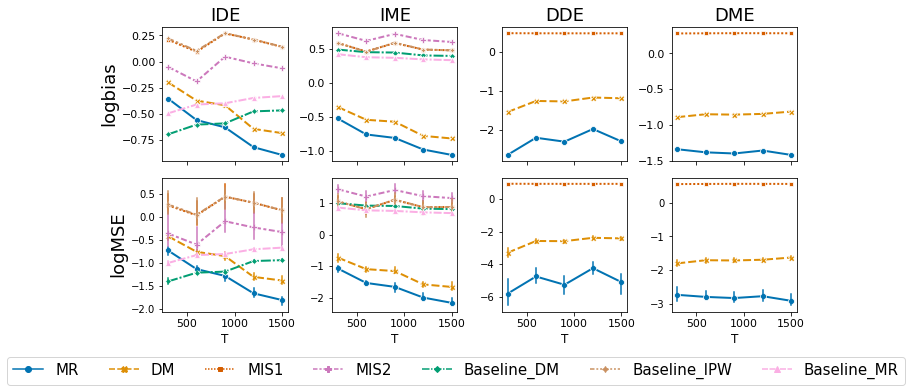

In [8]:
#Truncate does not matter 20 ok
import pickle
with open("s2m2_estimate_additive_identity_L7_stdM_1_stdS_1_Tbaselines.txt","rb") as fp:
    Error = pickle.load(fp)       
from plot import summary_baseline
result = summary_baseline(Error, N_range = [100], T_range = np.arange(1, 6) * 300, absolute = True, true = np.array([2.880559,3.955929]))
#result.groupby(['N','estimand']).mean()[['IDE_error','IME_error','DDE_error','DME_error',
#                                         'IDE_MSE','IME_MSE','DDE_MSE','DME_MSE']]
#Truncate does not matter 20 ok
import pickle
with open("s2m2_estimate_additive_identity_L7_stdM_1_stdS_1_T.txt","rb") as fp:
    Error = pickle.load(fp)       
from plot import plot, summary
result_1 = summary(Error, N_range = [100], T_range = np.arange(1, 6) * 300, absolute = True, true = np.array([2.880559,3.955929,1.602488,1.329421]))
#result.groupby(['N','estimand']).mean()[['IDE_error','IME_error','DDE_error','DME_error',
#                                         'IDE_MSE','IME_MSE','DDE_MSE','DME_MSE']]

result_all = pd.concat([result_1, result],ignore_index=True)
result_all = result_all[result_all.estimand.isin(['MR','DM', 'MIS1', 'MIS2','Baseline_IPW','Baseline_MR','Baseline_DM'])]

from plot import plot_baseline
plot_baseline(result_all, x='T')